<a href="https://colab.research.google.com/github/prahladpunia/AI/blob/main/TRAFFIC_SIGNALS_LENET_FEB_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

#STEP 0: PROBLEM STATEMENT    
In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them

The dataset contains 43 different classes of images.

Classes are as listed below:

( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')     
( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')    
( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')     
( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')    
( 8, b'Speed limit (120km/h)') ( 9, b'No passing')    
(10, b'No passing for vehicles over 3.5 metric tons')    
(11, b'Right-of-way at the next intersection') (12, b'Priority road')   
(13, b'Yield') (14, b'Stop') (15, b'No vehicles')    
(16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')    
(18, b'General caution') (19, b'Dangerous curve to the left')    
(20, b'Dangerous curve to the right') (21, b'Double curve')    
(22, b'Bumpy road') (23, b'Slippery road')    
(24, b'Road narrows on the right') (25, b'Road work')     
(26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')    
(29, b'Bicycles crossing') (30, b'Beware of ice/snow')     
(31, b'Wild animals crossing')     
(32, b'End of all speed and passing limits') (33, b'Turn right ahead')    
(34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')     
(37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')     
(40, b'Roundabout mandatory') (41, b'End of no passing')      
(42, b'End of no passing by vehicles over 3.5 metric tons')     
The network used is called Le-Net that was presented by Yann LeCun http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

#STEP 1: IMPORT LIBRARIES AND DATASET

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [6]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [7]:
X_train, y_train = train['features'], train['labels']

In [8]:
X_valid, y_valid = valid['features'], valid['labels']

In [9]:
X_test, y_test = test['features'], test['labels']

#2. Image Exploration

1

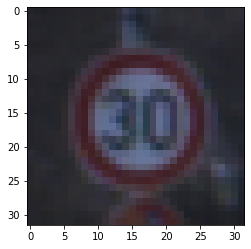

In [10]:
i=4000
plt.imshow(X_train[i])
y_train[i]

16

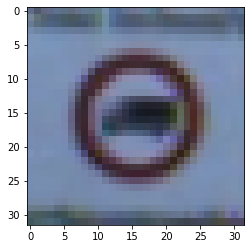

In [11]:
i=999
plt.imshow(X_test[i])
y_test[i]

#DATA PREPARATION

In [12]:
#Shuffle the data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [13]:
#Convert images to gray scale
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

In [15]:
X_valid_gray= np.sum(X_valid/3, axis=3, keepdims= True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

In [16]:
X_train_gray_norm =(X_train_gray-128)/128
X_valid_gray_norm = (X_valid_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128

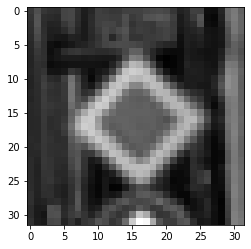

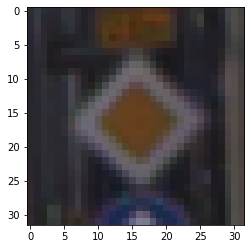

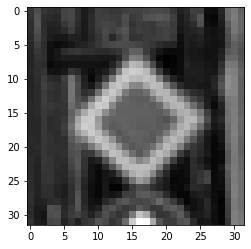

In [17]:
#Visualize an image
i=610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
#Original image
plt.figure()
plt.imshow(X_train[i])
#Normalized image
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

#STEP 4: MODEL TRAINING

The model consists of the following layers:

STEP 1: THE FIRST CONVOLUTIONAL LAYER #1     
Input = 32x32x1     
Output = 28x28x6      
Output = (Input-filter+1)/Stride* => (32-5+1)/1=28      
Used a 5x5 Filter with input depth of 3 and output depth of 6    
Apply a RELU Activation function to the output     
pooling for input, Input = 28x28x6 and Output = 14x14x6    

* Stride is the amount by which the kernel is shifted when the kernel is passed over the image.   

STEP 2: THE SECOND CONVOLUTIONAL LAYER #2    

Input = 14x14x6   
Output = 10x10x16     
Layer 2: Convolutional layer with Output = 10x10x16    
Output = (Input-filter+1)/strides => 10 = 14-5+1/1     
Apply a RELU Activation function to the output    
Pooling with Input = 10x10x16 and Output = 5x5x16     

STEP 3: FLATTENING THE NETWORK     

Flatten the network with Input = 5x5x16 and Output = 400    

STEP 4: FULLY CONNECTED LAYER     

Layer 3: Fully Connected layer with Input = 400 and Output = 120     
Apply a RELU Activation function to the output    
STEP 5: ANOTHER FULLY CONNECTED LAYER     

Layer 4: Fully Connected Layer with Input = 120 and Output = 84   
Apply a RELU Activation function to the output    
STEP 6: FULLY CONNECTED LAYER    

Layer 5: Fully Connected layer with Input = 84 and Output = 43     

In [18]:
# Import train_test_split from scikit library
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [19]:
image_shape = X_train_gray[i].shape

In [20]:
#Building the Model
cnn_model = Sequential()
cnn_model.add(Conv2D(6, kernel_size=(5,5), activation = 'relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation='softmax'))

In [21]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [22]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_valid_gray_norm,y_valid))

Epoch 1/50
70/70 [==============================] - 10s 10ms/step - loss: 3.2392 - accuracy: 0.1501 - val_loss: 2.8891 - val_accuracy: 0.3002
Epoch 2/50
70/70 [==============================] - 0s 5ms/step - loss: 1.8884 - accuracy: 0.4785 - val_loss: 1.6327 - val_accuracy: 0.5302
Epoch 3/50
70/70 [==============================] - 0s 5ms/step - loss: 1.0544 - accuracy: 0.6941 - val_loss: 1.0247 - val_accuracy: 0.6807
Epoch 4/50
70/70 [==============================] - 0s 5ms/step - loss: 0.6852 - accuracy: 0.8064 - val_loss: 0.8165 - val_accuracy: 0.7605
Epoch 5/50
70/70 [==============================] - 0s 5ms/step - loss: 0.5291 - accuracy: 0.8553 - val_loss: 0.7507 - val_accuracy: 0.7884
Epoch 6/50
70/70 [==============================] - 0s 5ms/step - loss: 0.4326 - accuracy: 0.8850 - val_loss: 0.6437 - val_accuracy: 0.8211
Epoch 7/50
70/70 [==============================] - 0s 5ms/step - loss: 0.3654 - accuracy: 0.9064 - val_loss: 0.5862 - val_accuracy: 0.8422
Epoch 8/50
70/70 [

#Model Evaluation

In [23]:
X_test_gray_norm.shape, y_test.shape

((12630, 32, 32, 1), (12630,))

In [24]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8823


In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

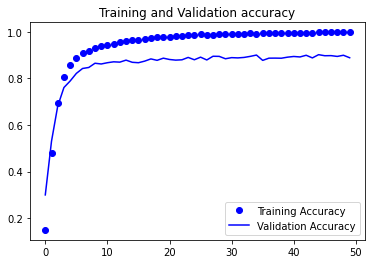

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


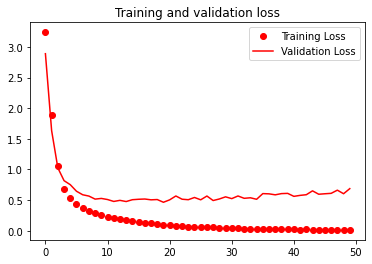

In [27]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [57]:
#get the predictions for the test data
predicted_classes = (cnn_model.predict(X_test_gray_norm)>0.5).astype("int32")
#(model.predict(x) > 0.5).astype("int32")
# predicted = np.argmax(model.predict(token_list),axis=1)
#predicted_classes=(predicted_classes>0.5).astype(int)
#get the indices to be plotted
y_true = y_test

SyntaxError: ignored

In [53]:
predicted_classes[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [56]:
y_true[1]

1

In [58]:
from sklearn.metrics import confusion_matrix
#accuracy_score(y_true, np.round(abs(y_pred)), normalize=False) 
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

ValueError: ignored

In [ ]:
predicted_classes

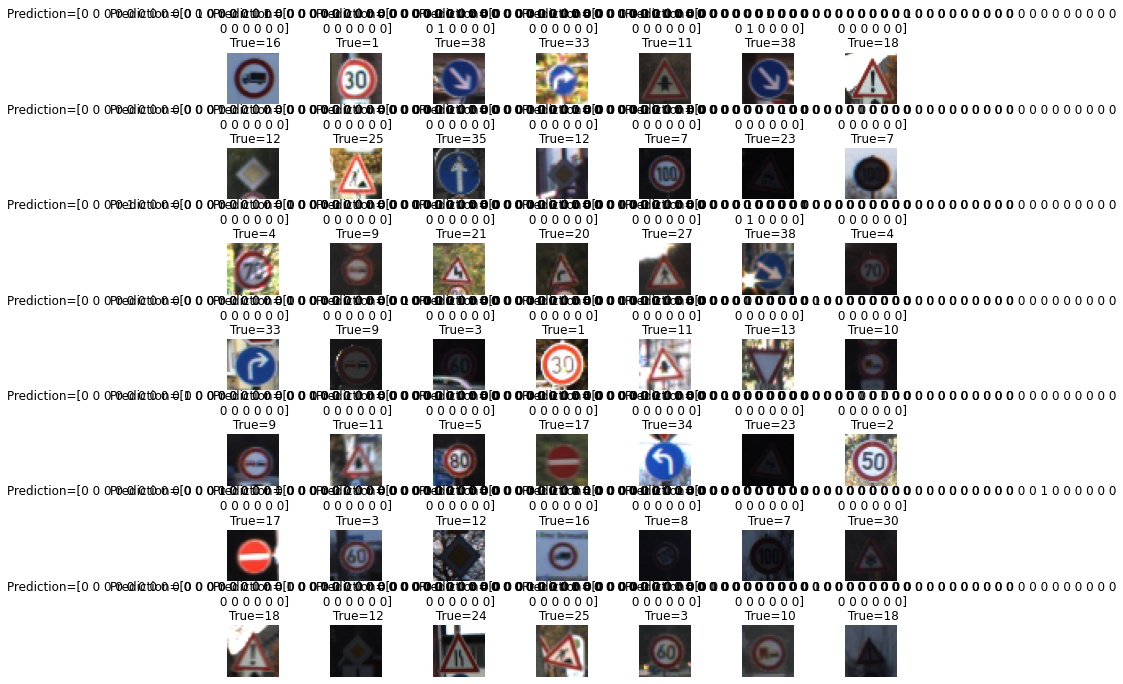

In [60]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()